# Welcome to Receptiviti!

We bet you have loads of text snippets that you want to understand from a psychological perspective. You're in the right place!

This Jupyter Notebook will get you started on the fundamentals of using the Receptiviti API, the variety of scores on offer and a quick sample analysis. Play around with the code on this notebook, modify it to your liking and most importantly, have buckets of fun!

Let's begin with

## Step 1 - Your API Keys
**Don't forget to add your API key and secret into the following cell**

In [1]:
API_KEY = ''
API_SECRET = ''

## Step 2 - Choose a text to analyze

Here's a sample that we really enjoy working with - Noah S. "Soggy" Sweat, Jr. gave a famous speech in 1952 on the floor of the Mississippi state legislature about whiskey.

In the following cell, we have created a list called `TEXT_SAMPLES` which contains two snippets of text that we will use to make a [bulk call to the Receptiviti API](#Step-7---Completing-a-bulk-request---Examining-the-speech-in-2-parts). 

We shall begin however, by joining these text samples into single piece of text and run through the basics of making a single call to the Receptiviti API

In [2]:
TEXT_SAMPLES = ['''My friends, I had not intended to discuss this controversial subject at this particular time. 
However, I want you to know that I do not shun controversy. On the contrary, I will take a stand on any 
issue at any time, regardless of how fraught with controversy it might be. You have asked me how I feel 
about whiskey. All right, here is how I feel about whiskey:If when you say whiskey you mean the devil's brew, 
the poison scourge, the bloody monster, that defiles innocence, dethrones reason, destroys the home, 
creates misery and poverty, yea, literally takes the bread from the mouths of little children; if you mean 
the evil drink that topples the Christian man and woman from the pinnacle of righteous, gracious living into 
the bottomless pit of degradation, and despair, and shame and helplessness, and hopelessness, then certainly 
I am against it.''',
'''But, if when you say whiskey you mean the oil of conversation, the philosophic wine, the ale that is consumed
when good fellows get together, that puts a song in their hearts and laughter on their lips, and the warm 
glow of contentment in their eyes; if you mean Christmas cheer; if you mean the stimulating drink that puts 
the spring in the old gentleman's step on a frosty, crispy morning; if you mean the drink which enables a 
man to magnify his joy, and his happiness, and to forget, if only for a little while, life's great tragedies, 
and heartaches, and sorrows; if youmean that drink, the sale of which pours into our treasuries untold 
millions of dollars, which are used to provide tender care for our little crippled children, our blind, 
our deaf, our dumb, our pitiful aged and infirm; to build highways and hospitals and schools, 
then certainly I am for it.
This is my stand. I will not retreat from it. I will not compromise.''']

SINGLE_TEXT_SAMPLE = ' '.join(TEXT_SAMPLES)
print("Let's analyze: ")
print(SINGLE_TEXT_SAMPLE)

Let's analyze: 
My friends, I had not intended to discuss this controversial subject at this particular time. 
However, I want you to know that I do not shun controversy. On the contrary, I will take a stand on any 
issue at any time, regardless of how fraught with controversy it might be. You have asked me how I feel 
about whiskey. All right, here is how I feel about whiskey:If when you say whiskey you mean the devil's brew, 
the poison scourge, the bloody monster, that defiles innocence, dethrones reason, destroys the home, 
creates misery and poverty, yea, literally takes the bread from the mouths of little children; if you mean 
the evil drink that topples the Christian man and woman from the pinnacle of righteous, gracious living into 
the bottomless pit of degradation, and despair, and shame and helplessness, and hopelessness, then certainly 
I am against it. But, if when you say whiskey you mean the oil of conversation, the philosophic wine, the ale that is consumed
when good f

## Step 3 - Install python libraries

If you are running this notebook within a Google Colab environment, you can skip ahead to [Step 4](#Step-4---Create-a-simple-API-call-helper). Google Colab provides all the requisite python libraries you will need to execute this Jupyter Notebook. 

If you are running this notebook locally or on your own server setup, determine if your system uses Conda or Pip to manage python dependencies. If you prefer Conda, follow the instructions [here](#Option-2---Conda) to install the requisite python libraries. If you prefer Pip, follow the instructions [here](#Option-3---Pip).

***Remember*** that you will only need to use either Conda ***or*** Pip to set up your python environment locally - not both. 

### Option 1 - Google Colab
Skip ahead to [Step 4](#Step-4---Create-a-simple-API-call-helper). You're all set!

### Option 2 - Conda
Uncomment the cell below and run

In [3]:
# import sys
# !conda install --yes --prefix {sys.prefix} requests pandas

### Option 3 - Pip
Uncomment the cell below and run

In [4]:
# import sys
# !{sys.executable} -m pip install requests pandas

## Step 4 - Create a simple API call helper

In [5]:
import json
import requests

API_URL = 'https://api.receptiviti.com/v1/score'

def get_payload_and_url(text):
    if len(text)<1:
        print("ERROR: 'text' should not be empty")
        return {}
    if isinstance(text, str):
        return ({
                    "content": text
                }, API_URL)
    if isinstance(text, list):
        return ([{
                    "content": content
        } for content in text], API_URL + '/bulk')

def call_receptiviti_api(text):
    payload, url = get_payload_and_url(text)
    results = []
    if len(payload)>0:
        response = requests.post(url, data=json.dumps(payload), auth=(API_KEY, API_SECRET), headers = {'Content-Type': 'application/json'})
        if response.status_code==200:
            results = response.json()
    return results

# print out the results
print("Single Call to Receptiviti API")
single_result = call_receptiviti_api(SINGLE_TEXT_SAMPLE)
display(single_result)

Single Call to Receptiviti API


{'plan_usage': {'word_limit': 250000,
  'words_used': 6715,
  'words_remaining': 243285,
  'percent_used': 2.69,
  'start_date': '2021-01-01T00:00:00Z',
  'end_date': '2021-01-31T23:59:59Z'},
 'results': [{'response_id': 'cb9f9886-ae4b-47e9-8a50-b460e652cb44',
   'language': 'en',
   'version': 'v1.0.0',
   'summary': {'word_count': 319,
    'words_per_sentence': 35.44444444444444,
    'sentence_count': 9,
    'six_plus_words': 0.26959247648902823,
    'emojis': 0,
    'emoticons': 0,
    'hashtags': 0,
    'urls': 0},
   'dictionary_measures': {'achievement': 0.006269592476489028,
    'adjectives': 0.04075235109717868,
    'admiration': 0.013555680597473016,
    'adverbs': 0.034482758620689655,
    'affective_processes': 0.09404388714733543,
    'affiliation': 0.03134796238244514,
    'all_punctuation': 0.1755485893416928,
    'ambifeel': 0.026599826078060256,
    'amusement': 0.016369123740344774,
    'analytical_thinking': 0,
    'anger': 0.05524579262366361,
    'anger_words': 0.00

## Step 5.1 - Convert the scores into a table format

The Receptiviti API outputs a JSON object containing scores. In the cell below, we convert this JSON object into a table format using Python library [pandas](http://pandas.pydata.org/). Once converted into a table format or a dataframe, as it is commonly known, it becomes easier to read and digest.

In [6]:
import pandas as pd

def convert_scores_to_table(results):
    dictionary_measures, receptiviti_measures = [], []
    if len(results)>0:
        for result in results['results']:
            if 'dictionary_measures' in result:
                # Pull out dictionary_measures
                dictionary_measures.append(result['dictionary_measures'])
            if 'receptiviti_measures' in result:
                # Pull out receptiviti measures
                receptiviti_measures.append(result['receptiviti_measures'])
    return (pd.DataFrame(dictionary_measures), pd.DataFrame(receptiviti_measures))

## Step 5.2 -  Display the scores in table format

In [7]:
single_dictionary_measures_df, single_receptiviti_measures_df = convert_scores_to_table(single_result)
print("Dictionary Measures as a table")
if len(single_dictionary_measures_df)>0:
    display(single_dictionary_measures_df)
else: 
    print("If you are seeing this message, it's because your plan does not include one or both of LIWC or SALLEE packages")
print("Receptiviti Measures as a table")
if len(single_receptiviti_measures_df)>0:
    display(single_receptiviti_measures_df)
else:
    print("If you are seeing this message, it's because your plan does not include the Personality Package")

Dictionary Measures as a table


,achievement,adjectives,admiration,adverbs,affective_processes,affiliation,all_punctuation,ambifeel,amusement,analytical_thinking,...,surprise,swear_words,tentative,they,time,time_orientation,verbs,we,work,you
0,0.00627,0.040752,0.013556,0.034483,0.094044,0.031348,0.175549,0.0266,0.016369,0,...,0,0.00627,0,0.009404,0.040752,0.119122,0.119122,0.018809,0.003135,0.031348


Receptiviti Measures as a table


,achievement,active,adventurous,affiliation,aggressive,agreeableness,ambitious,anxiety_prone,artistic,assertive,...,power,reward,risk_aversion,risk_seeking,self_assured,self_conscious,sociable,social,stress_prone,trusting
0,15.803876,43.858367,51.524772,75.987089,63.124357,45.260648,58.097586,39.719009,70.453891,72.394106,...,87.336349,52.879557,27.721013,31.186139,52.235598,42.261263,55.660544,80.945597,37.801878,30.243124


## Step 6 - Examine LIWC measures

**This section will work if you see non-empty dictionary_measures and LIWC measures [above](#Step-5.2----Display-the-scores-in-table-format). Your plan might not include LIWC as an output. If you are interested in adding LIWC to your plan, please [contact us](http://dashboard.receptiviti.com/contact).**

Let's start by looking at 4 very useful high level LIWC scores
* clout - measures signals of highly influential communication and strong leadership ability
* authentic - language reflects a speaker who is saying the words that come to mind without paying much attention to them as opposed to inauthentic language which is generally comprised of carefully chosen words
* social processes - measure how often you refer to others, friends and family, indicating more focus or attention on them
* drives - measure the focus on reward, risk, power and achievement

In the bar chart below, you can see that the Noah's speech shows a lot of clout and influence, but isn't as authentic or genuine. Although the social_processes and drives category is low, they are very near baseline values for natural speech. You can find out more about LIWC baseline values in the [LIWC 2015 Language Manual](http://liwc.wpengine.com/wp-content/uploads/2015/11/LIWC2015_LanguageManual.pdf)<br/>You can read more about the [LIWC package here](https://dashboard.receptiviti.com/docs/liwc).

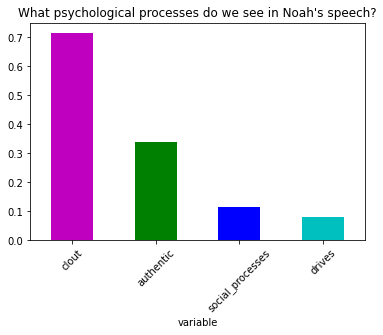

In [51]:
from IPython.display import Markdown
liwc_measures = ['clout', 'authentic', 'social_processes', 'drives']
if len(single_dictionary_measures_df)>0 and set(liwc_measures).issubset(set(single_dictionary_measures_df.columns)):
    axes = single_dictionary_measures_df[liwc_measures].\
            melt().\
            plot.bar(x="variable", y="value", rot=45, color=list('mgbcrky'), title="What psychological processes do we see in Noah's speech?")
    axes.get_legend().remove()
    a = axes.set_xticklabels(liwc_measures)
    display(Markdown("In the bar chart below, you can see that the Noah's speech shows a lot of clout and influence, but isn't as authentic or genuine. Although the social_processes and drives category is low, they are very near baseline values for natural speech. You can find out more about LIWC baseline values in the [LIWC 2015 Language Manual](http://liwc.wpengine.com/wp-content/uploads/2015/11/LIWC2015_LanguageManual.pdf)<br/>"+ 
                    "You can read more about the [LIWC package here](https://dashboard.receptiviti.com/docs/liwc)."))
else:
    display(Markdown("### **Your plan does not appear to include the LIWC package. If you are interested in adding the LIWC Package to your plan, please [contact us](http://dashboard.receptiviti.com/contact).**<br/>"))
    display(Markdown("[Documentation on the LIWC package](https://dashboard.receptiviti.com/docs/liwc)<br/>[Our Pricing](https://www.receptiviti.com/pricing)"))
    

## Step 7 - Completing a bulk request - Examining the speech in 2 parts

Reading the text, we see a definite turn in the speech about midway. While at first Noah is harsh about the effects of whiskey, in the second half, he praises its effects. Let's examine this speech in two parts to reveal this distinct more clearly through Receptiviti's API

In [9]:
# print out the results
print("Bulk Call to Receptiviti API")
bulk_result = call_receptiviti_api(TEXT_SAMPLES)
display(bulk_result)

Bulk Call to Receptiviti API


{'plan_usage': {'word_limit': 250000,
  'words_used': 7034,
  'words_remaining': 242966,
  'percent_used': 2.81,
  'start_date': '2021-01-01T00:00:00Z',
  'end_date': '2021-01-31T23:59:59Z'},
 'results': [{'response_id': '153bc108-1529-4349-a561-f378b5f5dfed',
   'language': 'en',
   'version': 'v1.0.0',
   'summary': {'word_count': 148,
    'words_per_sentence': 29.6,
    'sentence_count': 5,
    'six_plus_words': 0.2972972972972973,
    'emojis': 0,
    'emoticons': 0,
    'hashtags': 0,
    'urls': 0},
   'dictionary_measures': {'achievement': 0.006756756756756757,
    'adjectives': 0.02702702702702703,
    'admiration': 0.008806693086745927,
    'adverbs': 0.05405405405405406,
    'affective_processes': 0.0945945945945946,
    'affiliation': 0.006756756756756757,
    'all_punctuation': 0.17567567567567569,
    'ambifeel': 0.03522677234698371,
    'amusement': 0,
    'analytical_thinking': 0.6323566973566973,
    'anger': 0.07485689123734038,
    'anger_words': 0.013513513513513514,

In [10]:
### Display the scores in table format
bulk_dictionary_measures_df, bulk_receptiviti_measures_df = convert_scores_to_table(bulk_result)
print("Dictionary Measures as a table")
if len(bulk_dictionary_measures_df)>0:
    display(bulk_dictionary_measures_df)
else: 
    print("If you are seeing this message, it's because your plan does not include the LIWC or SALLEE packages")
print("Receptiviti Measures as a table")
if len(bulk_receptiviti_measures_df)>0:
    display(bulk_receptiviti_measures_df)
else:
    print("If you are seeing this message, it's because your plan does not include the Personality Package")

Dictionary Measures as a table


,achievement,adjectives,admiration,adverbs,affective_processes,affiliation,all_punctuation,ambifeel,amusement,analytical_thinking,...,surprise,swear_words,tentative,they,time,time_orientation,verbs,we,work,you
0,0.006757,0.027027,0.008807,0.054054,0.094595,0.006757,0.175676,0.035227,0.000000,0.632357,...,0,0.006757,0.033784,0.000000,0.027027,0.128378,0.135135,0.000000,0.000000,0.033784
1,0.005848,0.052632,0.017678,0.017544,0.093567,0.052632,0.175439,0.019111,0.030578,0.596118,...,0,0.005848,0.035088,0.017544,0.052632,0.111111,0.105263,0.035088,0.005848,0.029240


Receptiviti Measures as a table


,achievement,active,adventurous,affiliation,aggressive,agreeableness,ambitious,anxiety_prone,artistic,assertive,...,power,reward,risk_aversion,risk_seeking,self_assured,self_conscious,sociable,social,stress_prone,trusting
0,18.039066,47.218109,52.283719,8.393438,79.955285,33.673154,57.253734,48.511937,63.332671,68.756927,...,99.097826,39.787605,34.240338,24.666815,31.563055,37.542586,39.712620,50.406166,39.528904,35.086308
1,13.945442,48.966706,51.261839,95.560141,45.495721,59.751572,59.092492,30.323323,69.313107,59.874683,...,19.015538,62.865440,22.767659,36.139494,64.882475,39.427128,77.590803,92.889102,33.394107,43.154167


## Step 8 - Examine SALLEE measures

**This section will work if you see non-empty dictionary_measures and SALLEE measures [above](#Step-5.2----Display-the-scores-in-table-format). Your plan might not include SALLEE as an output. If you are interested in adding SALLEE to your plan, please [contact us](https://www.receptiviti.com/contact).**

Let's look at four emotions under SALLEE
* goodfeel - measures the extent of positive emotions
* badfeel - measures the extent of negative emotions
* love - measures feelings of love and adoration
* sadness - measures feelings of disappointment and sorrow

In the **1st** part of the speech, Noah makes a strong case **against** whiskey and in the **2nd** part, he is fiercly **for** it.<br />Notice that his goodfeel and love increase, when he speaks for whiskey i.e. the green bars are higher than the magenta bars for _goodfeel_ and _love_.<br />The reverse happens with badfeel and sadness.<br />Perhaps there is a way to settle the argument and truly learn how Noah Sweat, Jr. felt during his famous speech in 1952.<br />You can read more about the [SALLEE package here](https://dashboard.receptiviti.com/docs/sallee).

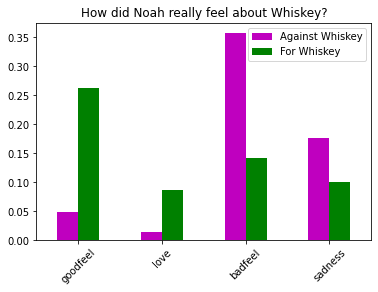

In [48]:
from IPython.display import Markdown
sallee_measures = ['goodfeel', 'love', 'badfeel', 'sadness']
if len(bulk_dictionary_measures_df)>0 and set(sallee_measures).issubset(set(bulk_dictionary_measures_df.columns)):
    plot_sallee_df = pd.DataFrame({
                            'Against Whiskey': bulk_dictionary_measures_df[sallee_measures].values[0], 
                            'For Whiskey': bulk_dictionary_measures_df[sallee_measures].values[1]}, 
                            index = sallee_measures)
    axes = plot_sallee_df.\
            plot.bar(rot=45, color=list('mgbcrky'), title="How did Noah really feel about Whiskey?")
    a = axes.set_xticklabels(sallee_measures)
    display(Markdown("In the **1st** part of the speech, Noah makes a strong case **against** whiskey and in the **2nd** part, he is fiercly **for** it.<br />"+
    "Notice that his goodfeel and love increase, when he speaks for whiskey i.e. the green bars are higher than the magenta bars for _goodfeel_ and _love_.<br />"+
    "The reverse happens with badfeel and sadness.<br />"+
    "Perhaps there is a way to settle the argument and truly learn how Noah Sweat, Jr. felt during his famous speech in 1952.<br />"+
    "You can read more about the [SALLEE package here](https://dashboard.receptiviti.com/docs/sallee)."))
else:
    display(Markdown("### **Your plan does not appear to include the SALLEE package. If you are interested in adding the SALLEE Package to your plan, please [contact us](http://dashboard.receptiviti.com/contact).**<br/>"))
    display(Markdown("[Documentation on the SALLEE package](https://dashboard.receptiviti.com/docs/sallee)<br/>[Our Pricing](https://www.receptiviti.com/pricing)"))
    

## Step 9 - Examine the Personality package measures

**This section will work if you see non-empty receptiviti_measures [above](#Step-5.2----Display-the-scores-in-table-format). Your plan might not include the Personality package as an output. If you are interested in adding LIWC to your plan, please [contact us](http://dashboard.receptiviti.com/contact).**

Let's start by looking at 4 very useful high level LIWC scores
* disciplined - from the Language-Based Personality framework is a facet under the Big 5 measure Conscientiousness and measures whether a person is prone to following routines and rules
* openness - from the Language-Based Personality framework is a Big 5 measure of the degree to which a person is open to new ideas or new experiences
* outward focus - from the Social Dynamics framework is the degree to which a person is focused on people other than themself
* power - from the Drives framework is the degree to which a person is driven by an internal need for power or domination

In the bar chart below, you can see that the Noah displays lower than average discipline and higher than average openness to new ideas and experiences. <br/>Noah's focus on people other than himself is very high, and follows from the contents of his speech. <br/>He demonstrates a high degree of power and domination as a lawmaker in government.<br/>You can read more about the [Personality package here](https://dashboard.receptiviti.com/docs/personality).

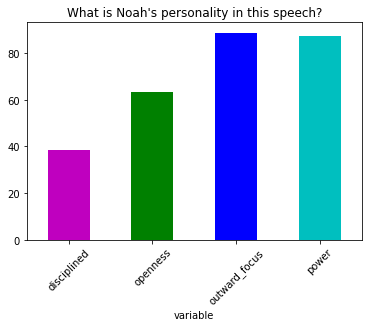

In [44]:
from IPython.display import Markdown
personality_measures = ['disciplined', 'openness', 'outward_focus', 'power']
if len(single_receptiviti_measures_df)>0 and set(personality_measures).issubset(set(single_receptiviti_measures_df.columns)):
    axes = single_receptiviti_measures_df[personality_measures].\
            melt().\
            plot.bar(x="variable", y="value", rot=45, color=list('mgbcrky'), title="What is Noah's personality in this speech?")
    axes.get_legend().remove()
    a = axes.set_xticklabels(personality_measures)
    display(Markdown("In the bar chart below, you can see that the Noah displays lower than average discipline and higher than average openness to new ideas and experiences. <br/>"+
                    "Noah's focus on people other than himself is very high, and follows from the contents of his speech. <br/>"+
                    "He demonstrates a high degree of power and domination as a lawmaker in government.<br/>"+
                    "You can read more about the [Personality package here](https://dashboard.receptiviti.com/docs/personality).")) 
else:
    display(Markdown("### **Your plan does not appear to include the Personality package. If you are interested in adding the Personality Package to your plan, please [contact us](http://dashboard.receptiviti.com/contact).**<br/>"))
    display(Markdown("[Documentation on the Personality package](https://dashboard.receptiviti.com/docs/personality)<br/>[Our Pricing](https://www.receptiviti.com/pricing)"))